In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('modified_data.csv')

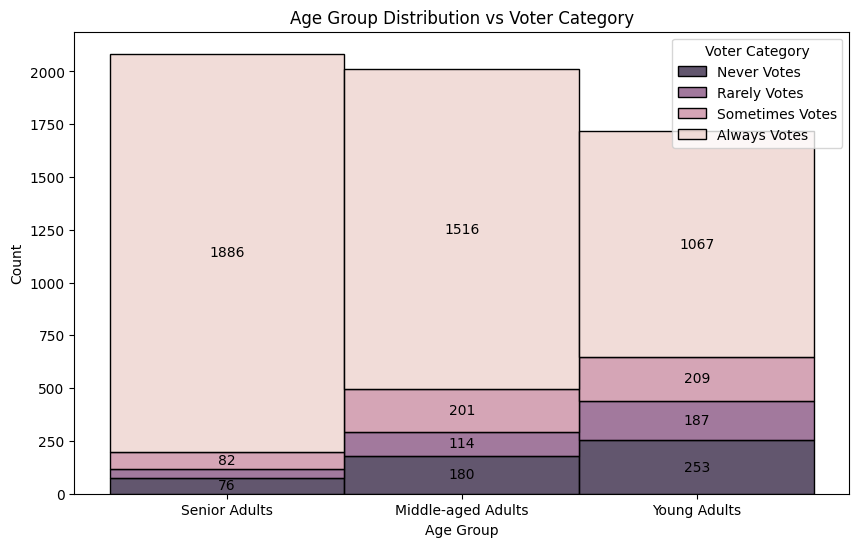

In [79]:
# plot histogram for Age_grp with Q24
temp = data[data['Q24'] != -1]
plt.figure(figsize=(10, 6))
sns_hist  = sns.histplot(data=temp, x='Age_grp', hue='Q24', multiple='stack')
# set data labels
plt.legend(title='Voter Category', labels=['Never Votes', 'Rarely Votes','Sometimes Votes', 'Always Votes'])
plt.title('Age Group Distribution vs Voter Category')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Annotate each section with data values
for p in sns_hist.patches:
    height = p.get_height()
    if height > 50:
        plt.annotate(f'{int(height)}', 
                     (p.get_x() + p.get_width() / 2., height/2+p.get_y()),
                     va = 'center', ha = 'center',)
plt.savefig('./Topic charts/topic-1.png', dpi=300, bbox_inches='tight')
plt.show()

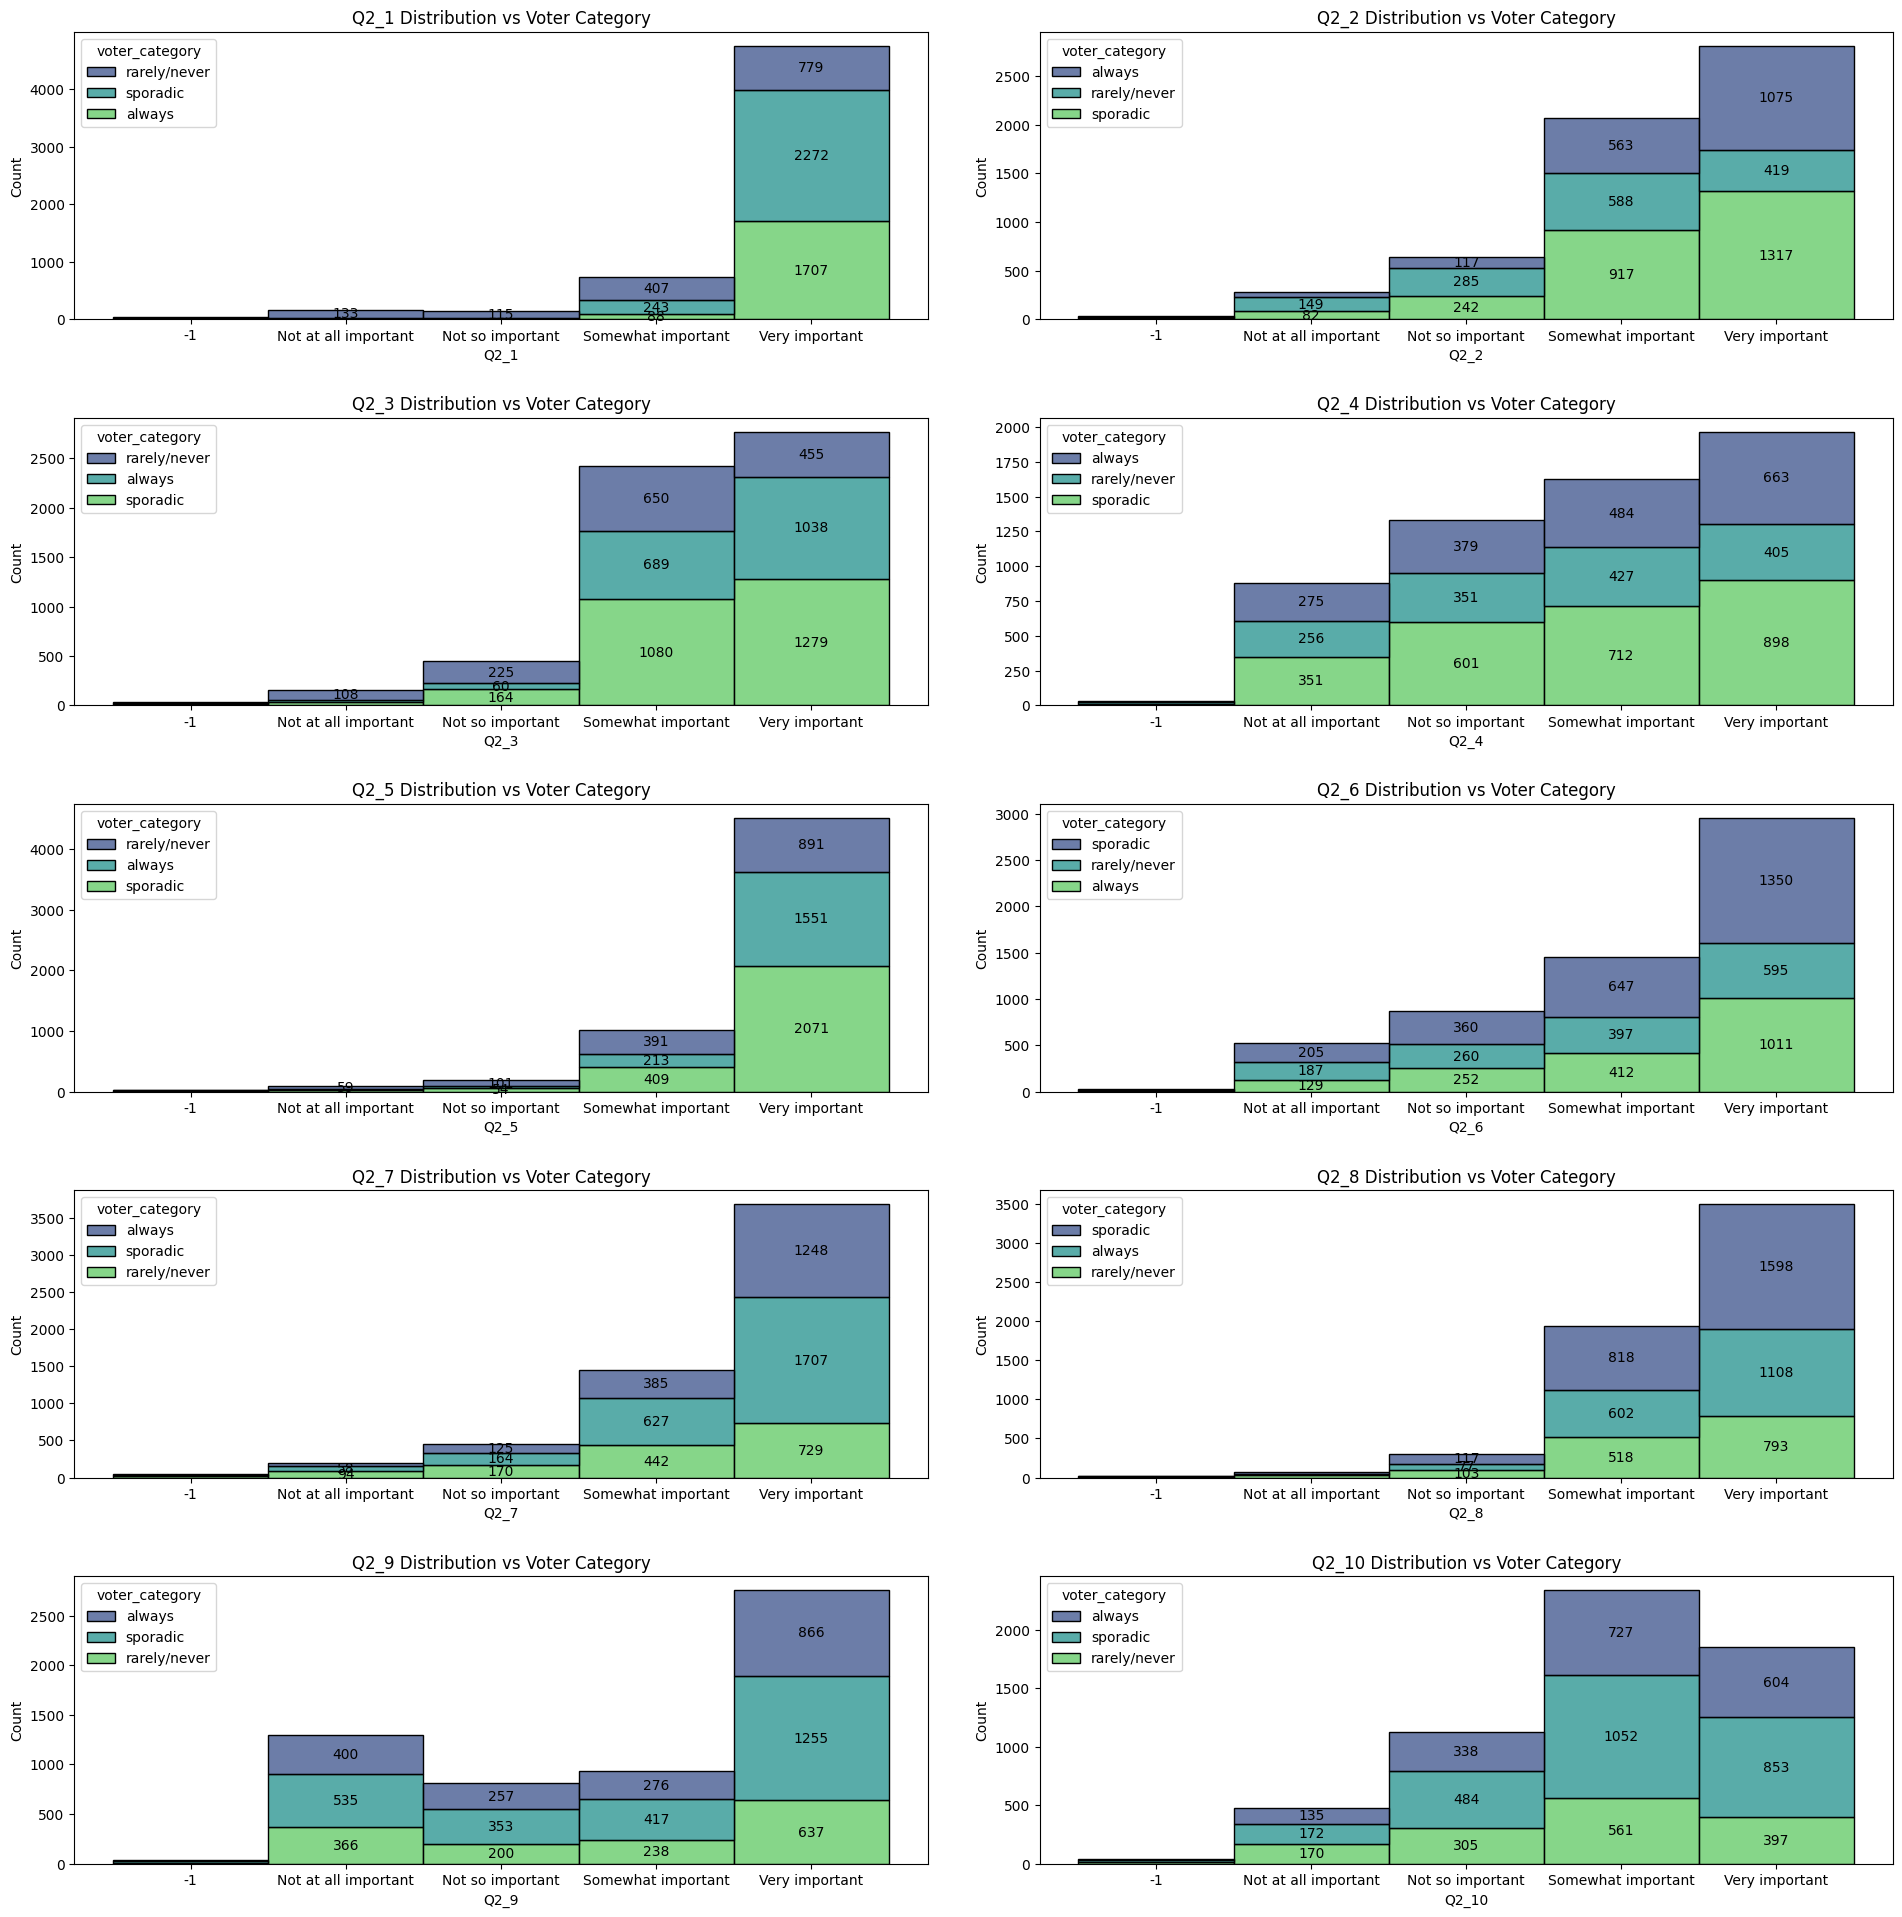

In [30]:
q2_columns = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10']

# plot histogram for Q2 columns
fig, ax = plt.subplots(5, 2, figsize=(20, 20))
# add padding
fig.tight_layout(pad=5.0)
for i, col in enumerate(q2_columns):
    temp = data[data[col] != -1].sort_values(by=col)
    sns_hist = sns.histplot(data=temp, x=col, hue='voter_category', multiple='stack',
                            palette='viridis', ax=ax[i//2, i%2])
    
    # set data labels
    for p in sns_hist.patches:
        height = p.get_height()
        if height > 50:
            ax[i//2, i%2].annotate(f'{int(height)}', 
                         (p.get_x() + p.get_width() / 2., height/2+p.get_y()),
                         va = 'center', ha = 'center',)
    ax[i//2, i%2].set_title(f'{col} Distribution vs Voter Category')
    ax[i//2, i%2].set_xlabel(col)
    ax[i//2, i%2].set_ylabel('Count')

plt.savefig('./Topic charts/cat-1.png', dpi=300, bbox_inches='tight')